In [1]:
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
df = pd.read_csv('/kaggle/input/super-store/SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
df.shape

(9994, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [6]:
# Check for duplicates
df.duplicated().sum()

17

In [8]:
# Drop duplicates
df= df.drop_duplicates()

In [9]:
df.shape

(9977, 13)

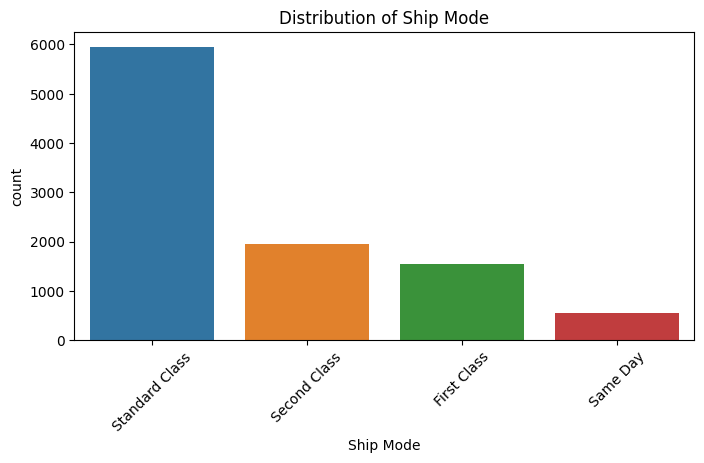

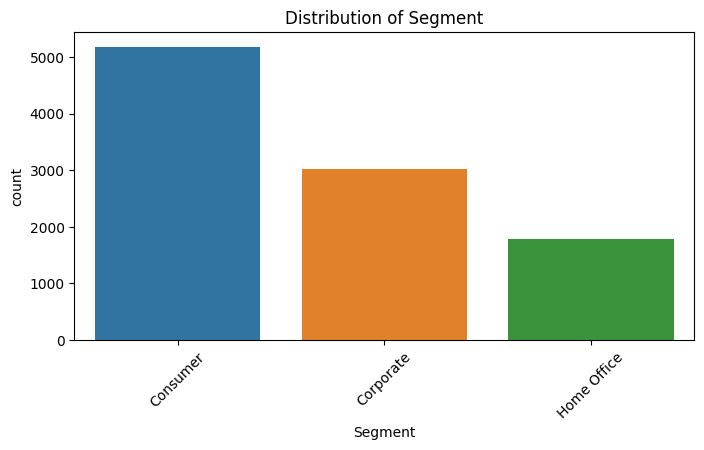

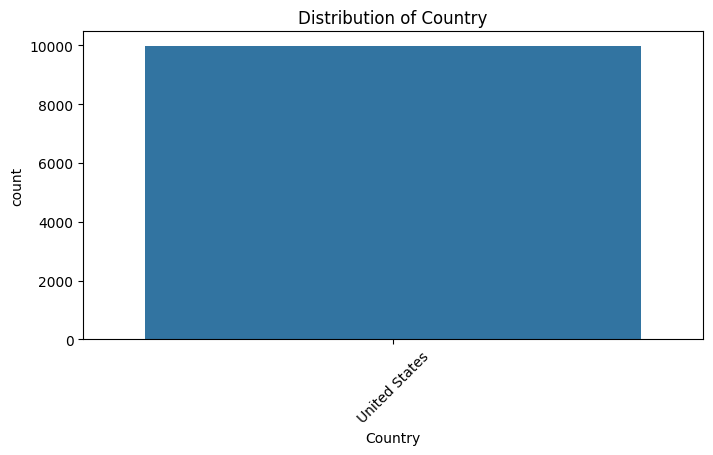

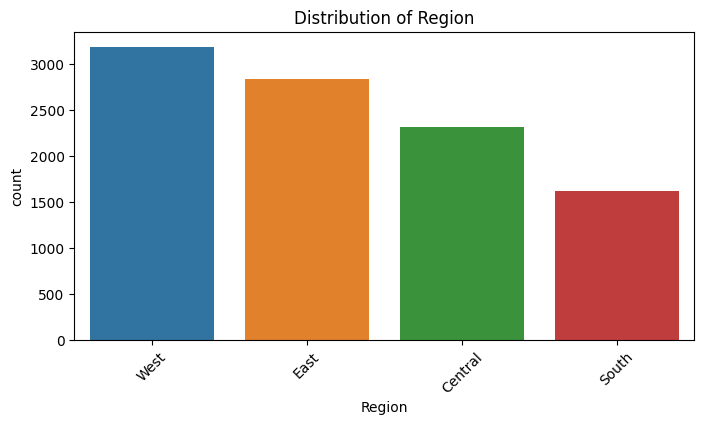

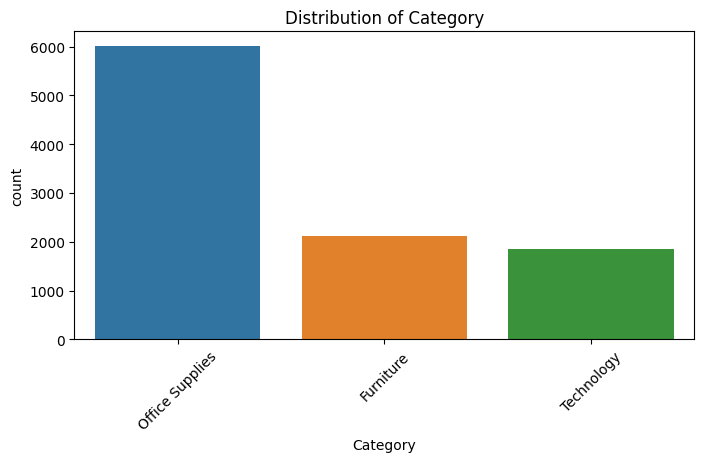

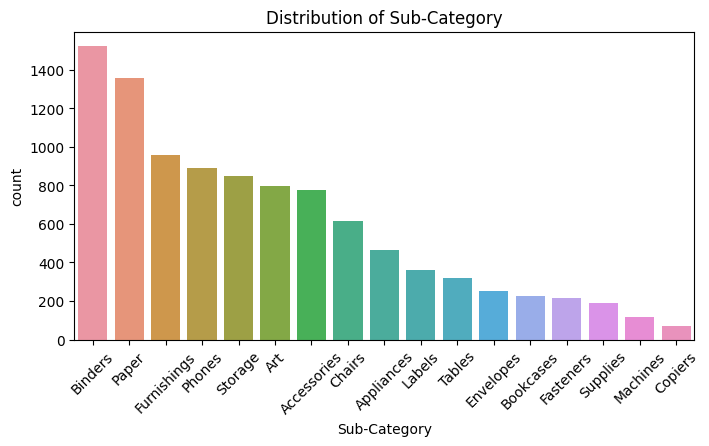

In [12]:
# Categorical distributions
categorical_cols = ['Ship Mode', 'Segment', 'Country', 'Region',
                    'Category', 'Sub-Category']

for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {col}")
    plt.show()

In [14]:
df['City'].nunique()

531

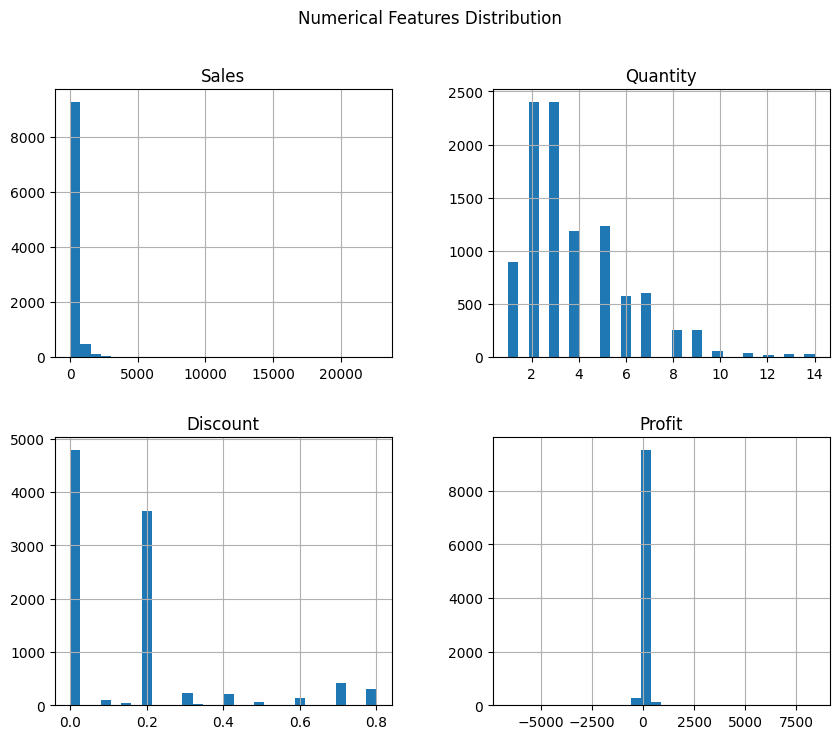

In [15]:
# Numerical distributions
num_cols = ['Sales', 'Quantity', 'Discount', 'Profit']
df[num_cols].hist(bins=30, figsize=(10,8))
plt.suptitle("Numerical Features Distribution")
plt.show()

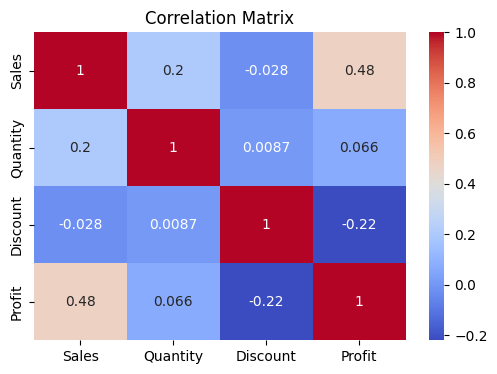

In [16]:
# Correlation matrix
plt.figure(figsize=(6,4))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

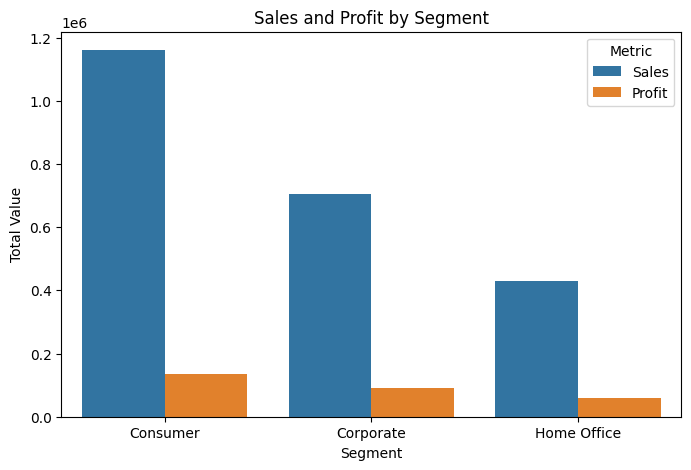

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group data by Segment
segment_data = df.groupby("Segment")[["Sales", "Profit"]].sum().reset_index()

# Melt into long format for seaborn
melted = segment_data.melt(id_vars="Segment", value_vars=["Sales", "Profit"],
                           var_name="Metric", value_name="Value")

plt.figure(figsize=(8,5))
sns.barplot(data=melted, x="Segment", y="Value", hue="Metric")

plt.title("Sales and Profit by Segment")
plt.ylabel("Total Value")
plt.show()


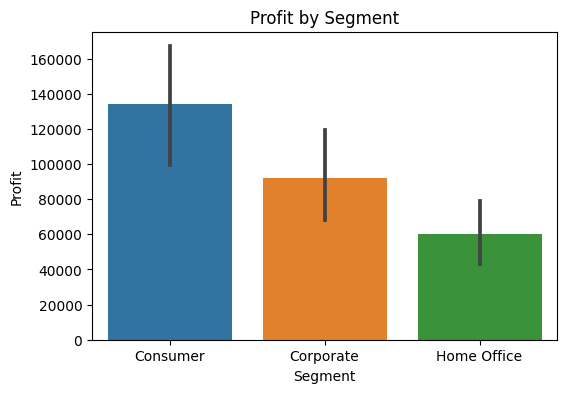

In [18]:
plt.figure(figsize=(6,4))
sns.barplot(data=df, x="Segment", y="Profit", estimator=sum)
plt.title("Profit by Segment")
plt.show()


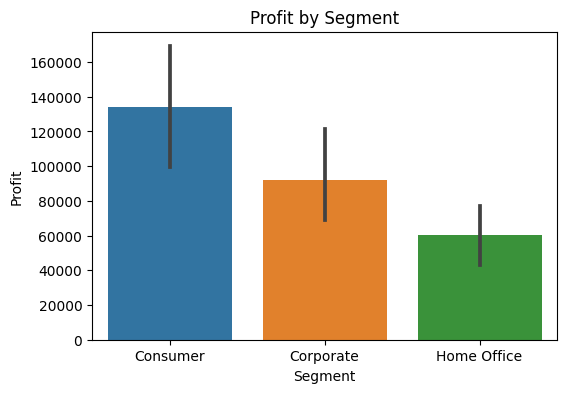

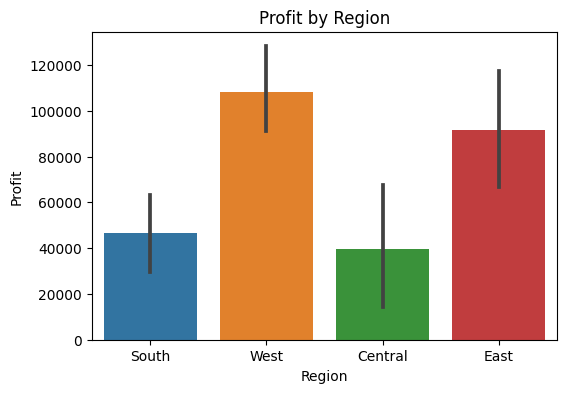

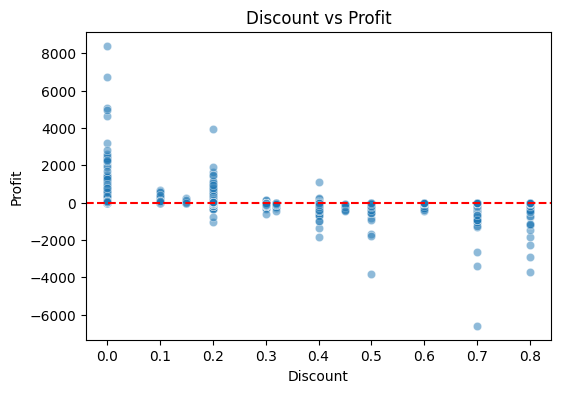

In [21]:
plt.figure(figsize=(6,4))
sns.barplot(data=df, x="Segment", y="Profit", estimator=sum)
plt.title("Profit by Segment")
plt.show()

# Region vs Profit
plt.figure(figsize=(6,4))
sns.barplot(data=df, x="Region", y="Profit", estimator=sum)
plt.title("Profit by Region")
plt.show()

# Discount vs Profit
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="Discount", y="Profit", alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title("Discount vs Profit")
plt.show()

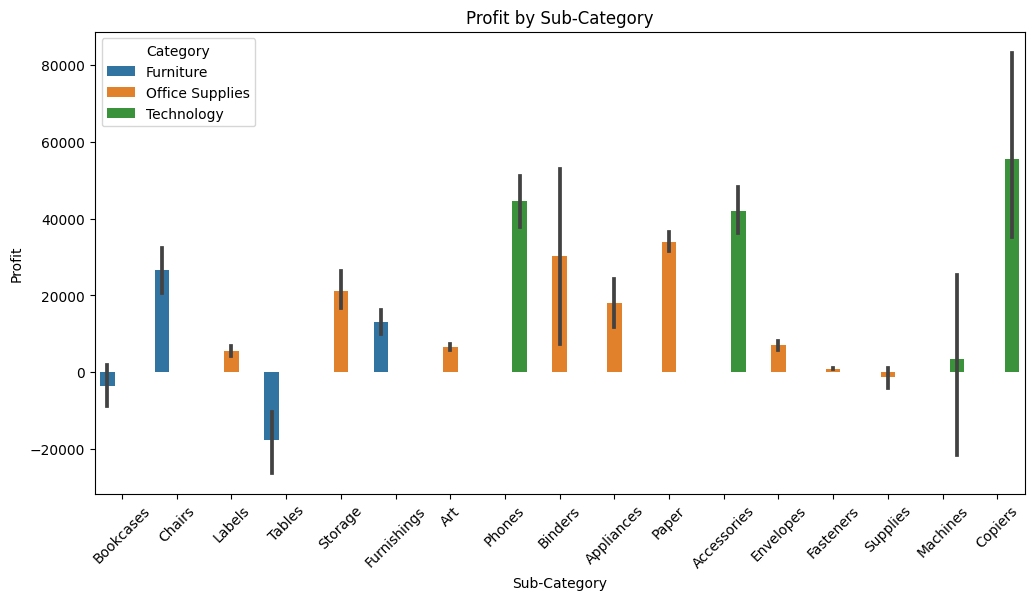

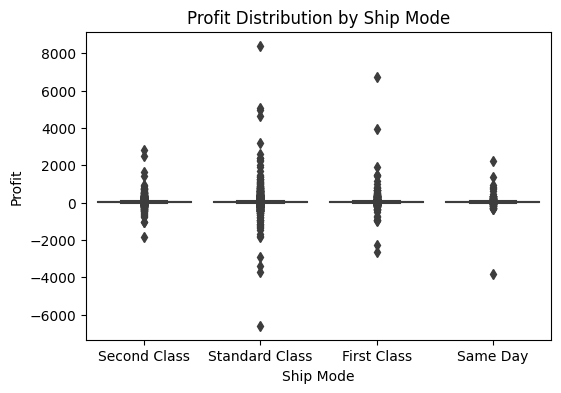

In [22]:
# Sales & Profit by Category & Sub-Category
plt.figure(figsize=(12,6))
sns.barplot(data=df, x="Sub-Category", y="Profit", hue="Category", estimator=sum)
plt.xticks(rotation=45)
plt.title("Profit by Sub-Category")
plt.show()

# Ship Mode impact on Profit
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="Ship Mode", y="Profit")
plt.title("Profit Distribution by Ship Mode")
plt.show()

In [23]:
# Top 10 cities by sales
top_cities = df.groupby("City")["Sales"].sum().sort_values(ascending=False).head(10)
print("Top 10 Cities by Sales:\n", top_cities)

# Loss-making sub-categories
loss_items = df.groupby("Sub-Category")["Profit"].sum().sort_values().head(5)
print("Loss-Making Sub-Categories:\n", loss_items)

# Segment contribution
segment_sales = df.groupby("Segment")["Sales"].sum()
segment_profit = df.groupby("Segment")["Profit"].sum()
print("Sales by Segment:\n", segment_sales)
print("Profit by Segment:\n", segment_profit)

Top 10 Cities by Sales:
 City
New York City    256319.0410
Los Angeles      175831.9010
Seattle          119460.2820
San Francisco    112577.1720
Philadelphia     109061.4610
Houston           64441.2564
Chicago           48535.9770
San Diego         47521.0290
Jacksonville      44713.1830
Springfield       43054.3420
Name: Sales, dtype: float64
Loss-Making Sub-Categories:
 Sub-Category
Tables      -17725.4811
Bookcases    -3472.5560
Supplies     -1189.0995
Fasteners      949.5182
Machines      3384.7569
Name: Profit, dtype: float64
Sales by Segment:
 Segment
Consumer       1.160832e+06
Corporate      7.060701e+05
Home Office    4.292927e+05
Name: Sales, dtype: float64
Profit by Segment:
 Segment
Consumer       134004.4705
Corporate       91954.9798
Home Office     60279.0015
Name: Profit, dtype: float64


**Insights**
1. **Segment Analysis:** i]Consumer segment contributes the highest sales, while Corporate is moderately                        profitable.
                    ii]Interpretation: Consumers are driving revenue, but profit margins vary across                        segments.
           **Action:** Focus marketing efforts on Consumer while improving discount policies for                            Corporate.
2. **Discount vs Profit:** i]Higher discounts are strongly associated with negative profits.
                      ii]Interpretation: Discounting strategy is hurting profitability.
          **Action:** Limit discounts on low-margin categories like Furniture.
3. **Category/Sub-Category**:i]Technology products have the highest profit margins, while Furniture                                 (Tables, Bookcases) often incur losses.
       **Interpretation:** Certain sub-categories are loss-making despite good sales.
               **Action:** Revisit pricing and supplier costs for Furniture or discontinue                                      unprofitable sub-categories.
4. **Regional Performance:** i]The West region has the highest profit, while the South lags behind.
        **Interpretation:** Regional differences may be due to logistics or customer base.
      **Action:** Strengthen distribution and promotions in underperforming regions.
5. **Shipping Mode:** i]Same-day and Second Class shipping have lower profit margins compared to                             Standard Class.
**Interpretation:** Faster shipping increases operational costs.
**Action:** Encourage customers to choose Standard shipping via incentives.